<a href="https://colab.research.google.com/github/LuizFelipee96/ProjetoDS/blob/main/ProjetoDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise Pré-Processamento

In [1]:
#importar as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
#Carregar o Dataset

epl = pd.read_csv('/content/ProjetoDS.csv', encoding='windows-1254', delimiter=';')


In [3]:
#Mostrar a tabela
epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
#Verificar dados vazios
epl.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [5]:
#Mostrar informações
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [6]:
#Mostrar só a tabela do Chelsea
chelsea_epl = epl.loc[epl['Club'] == 'Chelsea']
chelsea_epl

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
5,César Azpilicueta,Chelsea,ESP,DF,30,26,24,2188,1,2,2015,87.5,0,0,0.03,0.11,5,1
6,N'Golo Kanté,Chelsea,FRA,MF,29,30,24,2146,0,2,1504,86.6,0,0,0.04,0.05,7,0
7,Jorginho,Chelsea,ITA,MF,28,28,23,2010,7,1,1739,89.5,7,9,0.31,0.09,2,0
8,Thiago Silva,Chelsea,BRA,DF,35,23,23,1935,2,0,1871,93.5,0,0,0.05,0.02,5,1
9,Kurt Zouma,Chelsea,FRA,DF,25,24,22,2029,5,0,1720,91.9,0,0,0.08,0.00,3,0


**Análise Exploratória dos dados**

In [7]:
#Total de Gols
Total_Goals = epl['Goals'].sum()
Total_Goals


986

In [8]:
#Total de Assistências
Total_Assists = epl['Assists'].sum()
Total_Assists

685

In [9]:
#Total de Cobranças de Pênaltis
Total_Penalty_Attemps = epl['Penalty_Attempted'].sum()
Total_Penalty_Attemps

125

In [10]:
#Total gols de Pênaltis
Total_Penalty_Goals = epl['Penalty_Goals'].sum()
Total_Penalty_Goals

102

In [11]:
#Total de Cobranças Perdidas
Total_Penalty_Miss = Total_Penalty_Attemps - Total_Penalty_Goals
Total_Penalty_Miss

23

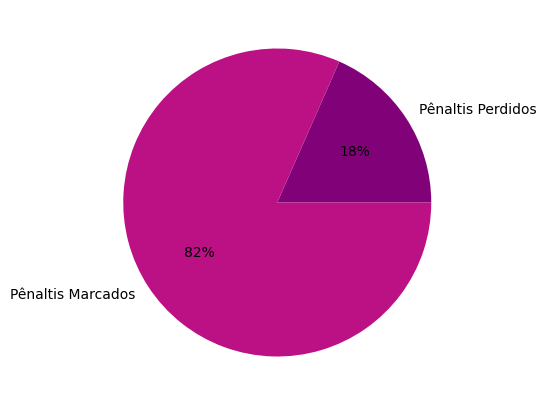

In [12]:
plt.figure(figsize=(11,5))
data = [Total_Penalty_Miss,Total_Penalty_Goals]
labels = ['Pênaltis Perdidos','Pênaltis Marcados']
colors = sns.color_palette('RdPu_r')[0:3]
plt.pie(data,labels = labels,colors = colors,autopct='%.0f%%')
plt.show()

In [13]:
#Quantidade de Nacionalidades da Liga
np.size((epl['Nationality'].unique()))

59

<Axes: xlabel='Nationality'>

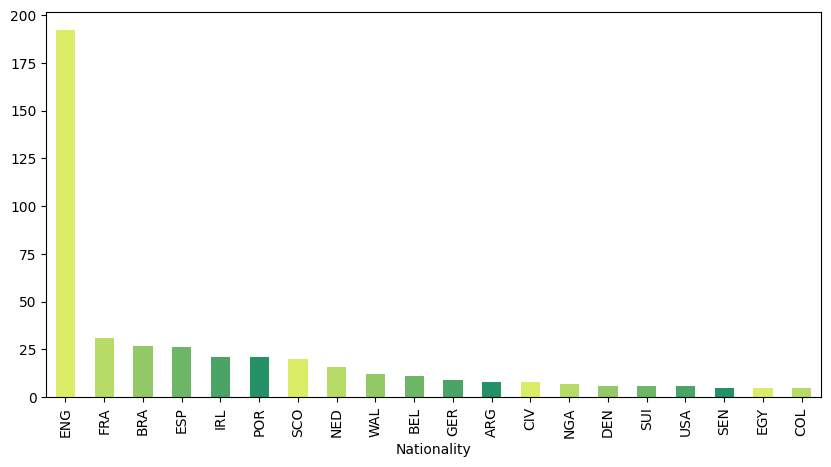

In [14]:
#Top 20 Maiores nacionalidades da Premier League

nationality = epl.groupby('Nationality').size().sort_values(ascending = False)
nationality.head(20).plot(kind ='bar',figsize=(10,5),color = sns.color_palette("summer_r"))

<Axes: ylabel='Club'>

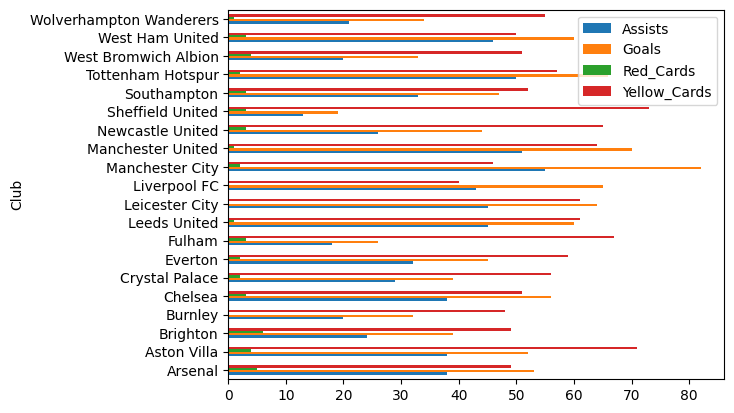

In [15]:
#Quantidade de gols, assistências, Cartão Amarelo e Cartão vermelho por clubes
pd.pivot_table(epl[['Goals' , 'Assists','Yellow_Cards', 'Red_Cards']] , index = epl['Club'] ,aggfunc = 'sum').plot(kind = 'barh')

In [16]:
#Top 10 jogadores que mais deram assistências
top_10_assists = epl[['Name' , 'Club', 'Assists','Matches']].nlargest(n=10,columns = 'Assists')
top_10_assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


In [17]:
#Top 10 artilheiros da Premier League
top_10_goals = epl[['Name' , 'Club', 'Goals','Matches']].nlargest(n=10,columns = 'Goals')
top_10_goals

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,?lkay Gündo?an,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


<Axes: title={'center': 'Total de jogadores por posição'}, ylabel='Position'>

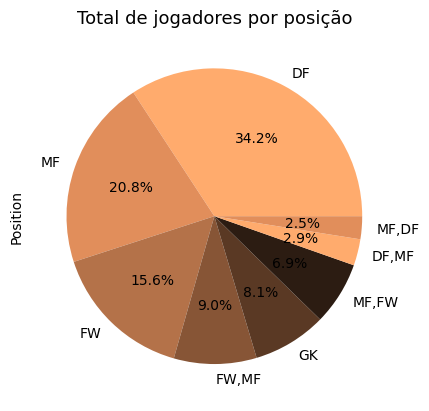

In [18]:
# Total de Posições dentro da Liga
colors = sns.color_palette("copper_r")

plt.title('Total de jogadores por posição', fontsize = 13)
epl['Position'].value_counts().head(8).plot(kind = 'pie',colors = colors,autopct="%.1f%%")

<Axes: >

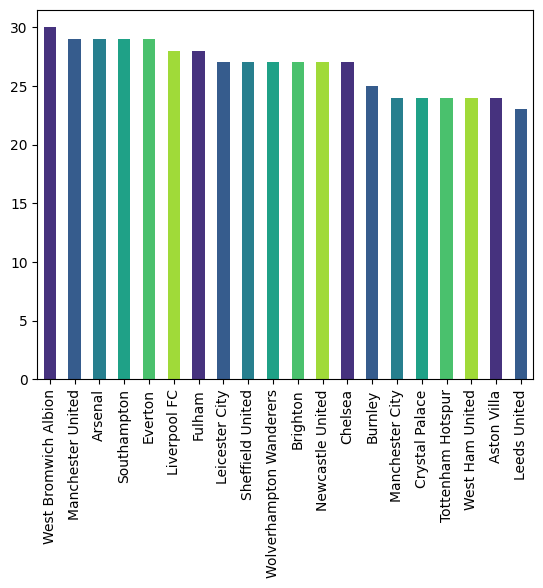

In [19]:
#Total de jogadores por Clube
epl['Club'].value_counts().nlargest(20).plot(kind = 'bar' , color = sns.color_palette('viridis'))

# Cálculo Média, Moda e Mediana

In [20]:
#Média de Minutos jogados por partida e gols por partida
epl['MinsPerMatch'] = (epl['Mins'] / epl['Matches']).astype(float)
epl['Goals_Per_Match'] = (epl['Goals'] / epl['Matches']).astype(float)
epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,Goals_Per_Match
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80.277778,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88.548387,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74.342857,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84.666667,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74.156250,0.031250


In [21]:
#Média de Gols do top 10 de artilheiros da liga
top_10_goals_per_match = epl[['Name' ,'Goals','Goals_Per_Match']].nlargest(n=10,columns = 'Goals_Per_Match')
top_10_goals_per_match

,Name,Goals,Goals_Per_Match
162,Harry Kane,23,0.657143
81,Mohamed Salah,22,0.594595
307,Joe Willock,8,0.571429
145,Jesse Lingard,9,0.562500
175,Gareth Bale,11,0.550000
74,Anthony Elanga,1,0.500000
51,Bruno Fernandes,18,0.486486
237,Dominic Calvert-Lewin,16,0.484848
120,Kelechi Iheanacho,12,0.480000
92,Diogo Jota,9,0.473684


In [22]:
#Maior média de idade por equipe
num_player = epl.groupby('Club').size()
data = (epl.groupby('Club')['Age'].sum())/ num_player
data.sort_values(ascending = False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

In [30]:
# Moda e a mediana de idade do Chelsea
num_player = chelsea_epl.groupby('Club').size()
data = (chelsea_epl.groupby('Club')['Age'].sum()) / num_player
data.sort_values(ascending=False, inplace=True)

moda_age = data.mode()[0]
mediana_age = data.median()

print(f'Moda de idade por clube: {moda_age:.10f}')
print(f'Mediana de idade por clube: {mediana_age:.10f}')

Moda de idade por clube: 25.5925925926
Mediana de idade por clube: 25.5925925926


In [32]:
#Moda e Mediana do Top10 Artilheiros da Premier League
top_10_goals_per_match = epl[['Name', 'Goals', 'Goals_Per_Match']].nlargest(n=10, columns='Goals_Per_Match')


mediana_goals_per_match = top_10_goals_per_match['Goals_Per_Match'].median()

print(f'Mediana de gols por partida: {mediana_goals_per_match:.4f}')

Mediana de gols por partida: 0.5250
